<a href="https://colab.research.google.com/github/AirPro/Adult-Income-Remake/blob/master/Module2Lecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hand On Lecture Coding for Module 2
## Artificial Neural Network
### Robert Freid - Deep Learning Class 
Date: January 24, 2023

In [21]:
# import statements
import numpy as py
import matplotlib.pyplot as plt

In [22]:
# import the MNIST dataset from KARAS
from tensorflow.keras.datasets import mnist

# save the training data in X_train and X_test and the testing data in y_train and y_test
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# print the imported datasets to verify import
print("X_train shape = ", X_train.shape)
print("y_train shape = ", y_train.shape)
print("X_test shape = ", X_test.shape)
print("y_test shape = ", y_test.shape)

X_train shape =  (60000, 28, 28)
y_train shape =  (60000,)
X_test shape =  (10000, 28, 28)
y_test shape =  (10000,)


## Plot random images from the MINST dataset

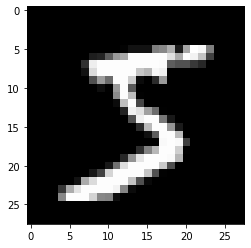

In [23]:
plt.imshow(X_train[0], cmap = plt.get_cmap('gray'))
plt.show()

# Create Artificial Neural Network Model 
## Step 1: Preparation of data for input

In [24]:
# reshape 60,000 28 x 28 matrices into 60,000 784-length vectors (28 x 28 = 784)
X_train = X_train.reshape(60000, 784)
# reshape 10000 28 x 28 matrices into 10000 784-length vectors (28 x 28 = 784)
X_test = X_test.reshape(10000, 784)

# change integers into 32-bit floating point numbers
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalize each value for each pixel for the entire vector for each input
X_train /= 255
X_test /= 255
# by dividing by 255, we will end up with all values being between 0 and 255

# print out the values for examination
print("Training matrix shape = ", X_train.shape)
print("Testing matrix shape = ", X_test.shape)

Training matrix shape =  (60000, 784)
Testing matrix shape =  (10000, 784)


## Step 2: Create the ANN classification Model

In [25]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation

# create the model
model = Sequential()

# add the first layer of of the model
model.add(Dense(512, input_shape= (784,)))

# to enhance the model performance, we add some activation and dropout layers
model.add(Activation('relu'))

# add a dropout layer
model.add(Dropout(0.2))

# add a second dense layer
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

# create the final layer
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               401920    
                                                                 
 activation_6 (Activation)   (None, 512)               0         
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 512)               262656    
                                                                 
 activation_7 (Activation)   (None, 512)               0         
                                                                 
 dropout_5 (Dropout)         (None, 512)               0         
                                                                 
 dense_8 (Dense)             (None, 10)               

In [26]:
from keras.utils import np_utils

# number of unique digits in the mnist dataset
np_classes = 10 

# convert thte Y-train and y_test to one-hot encoding
y_train = np_utils.to_categorical(y_train, np_classes)
y_test = np_utils.to_categorical(y_test, np_classes)

## Set the Model compilar


In [27]:
# Use the Adam optimizer for learning, options include loss, optimizer, and metrics
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Train the ANN model

In [28]:
history = model.fit(X_train, y_train, batch_size=128, epochs = 5, verbose = 1)

Epoch 1/5
469/469 [==============================] - 8s 17ms/step - loss: 0.2509 - accuracy: 0.9250
Epoch 2/5
469/469 [==============================] - 8s 16ms/step - loss: 0.1015 - accuracy: 0.9690
Epoch 3/5
469/469 [==============================] - 8s 16ms/step - loss: 0.0708 - accuracy: 0.9782
Epoch 4/5
469/469 [==============================] - 8s 16ms/step - loss: 0.0533 - accuracy: 0.9830
Epoch 5/5
469/469 [==============================] - 8s 17ms/step - loss: 0.0468 - accuracy: 0.9846


## Evaluate (TEST) the ANN classifer

In [29]:
score = model.evaluate(X_test, y_test)

print("Test loss value = ", score[0])
print("Test accuracy = ", score[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.0690 - accuracy: 0.9786
Test loss value =  0.06902448832988739
Test accuracy =  0.978600025177002


## Plot the Training accuracy process each epoch

In [30]:
history.history

{'loss': [0.250861793756485,
  0.10151815414428711,
  0.07077673077583313,
  0.05332367867231369,
  0.046778593212366104],
 'accuracy': [0.9249666929244995,
  0.9690499901771545,
  0.9782000184059143,
  0.9829999804496765,
  0.9846000075340271]}

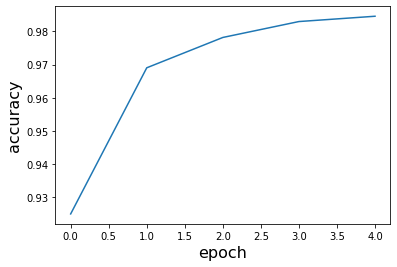

In [31]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch', fontsize = 16)
plt.ylabel('accuracy', fontsize = 16)
plt.show()

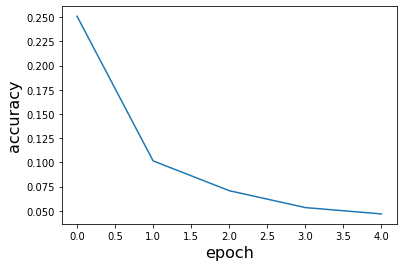

In [32]:
plt.plot(history.history['loss'])
plt.xlabel('epoch', fontsize = 16)
plt.ylabel('accuracy', fontsize =16)
plt.show()